In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Dataset
df = pd.read_excel('/content/data sudah cleanning_heart.xlsx')

In [4]:
# 2. Informasi Dasar
print("--- Info Dataset ---")
print(df.info())
print("\n--- Statistik Deskriptif ---")
display(df.describe())

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

--- Statistik Deskriptif ---


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/tmp/ipython-input-3126486329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


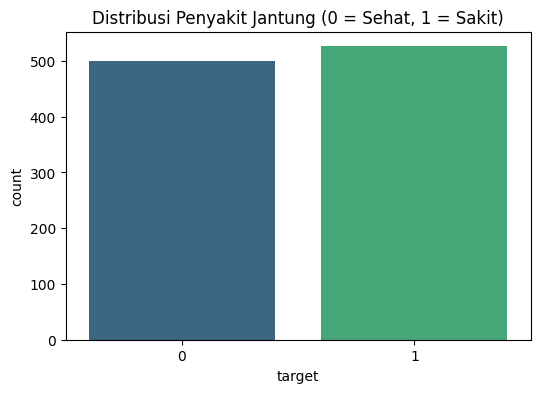

In [5]:
# 3. Visualisasi Distribusi Target (Heart Disease)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribusi Penyakit Jantung (0 = Sehat, 1 = Sakit)')
plt.show()

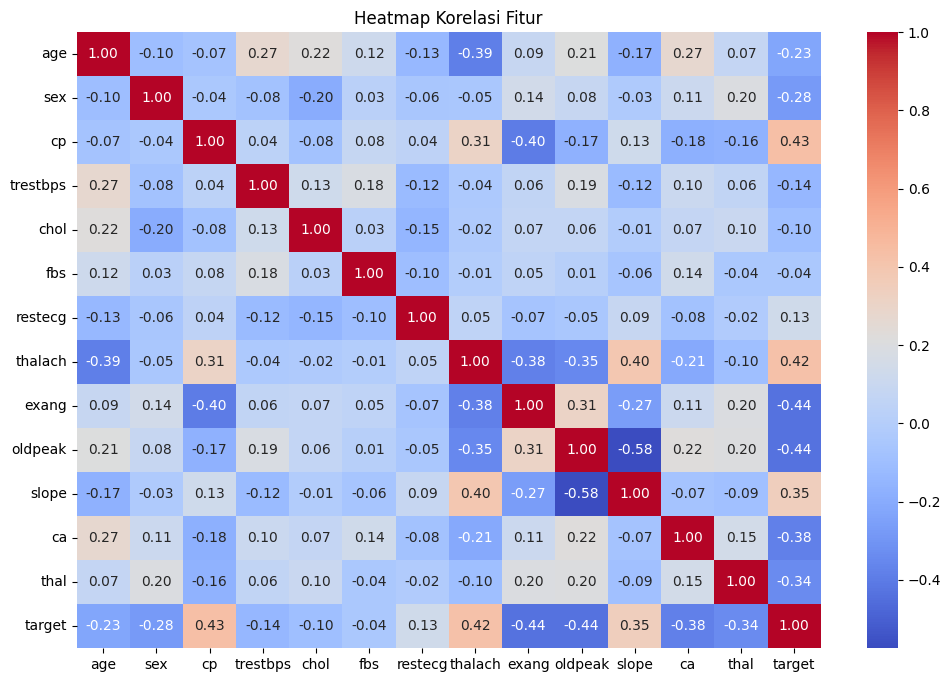

In [6]:
# 4. Korelasi antar Fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur')
plt.show()

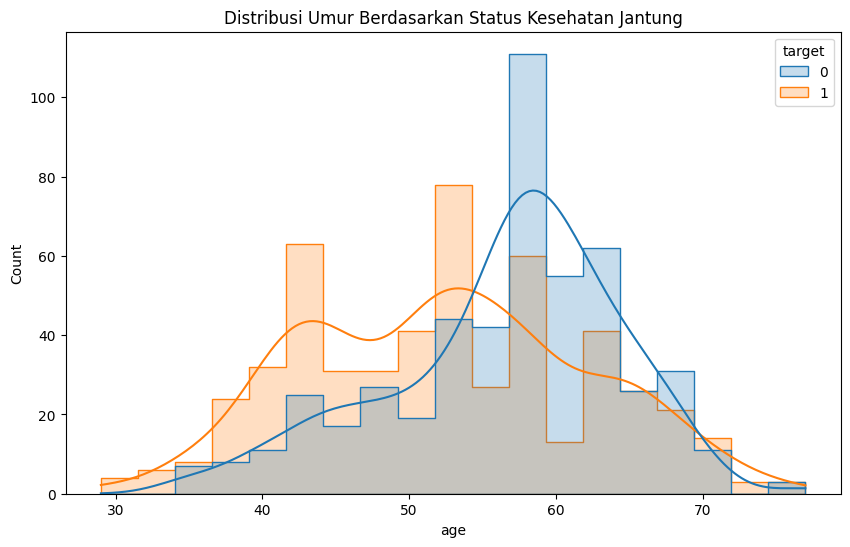

In [7]:
# 5. Analisis Berdasarkan Umur dan Jenis Kelamin
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, element="step")
plt.title('Distribusi Umur Berdasarkan Status Kesehatan Jantung')
plt.show()

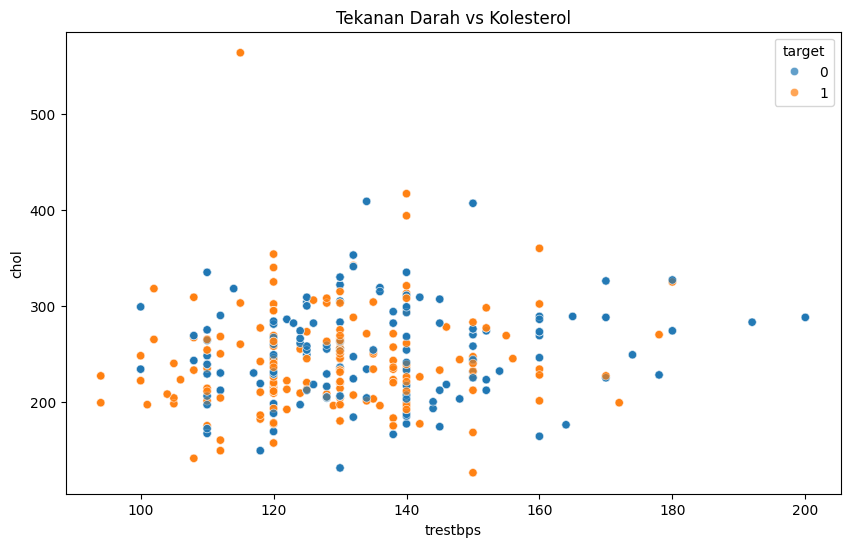

In [8]:
# 6. Hubungan Tekanan Darah (trestbps) vs Kolesterol (chol)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trestbps', y='chol', hue='target', data=df, alpha=0.7)
plt.title('Tekanan Darah vs Kolesterol')
plt.show()

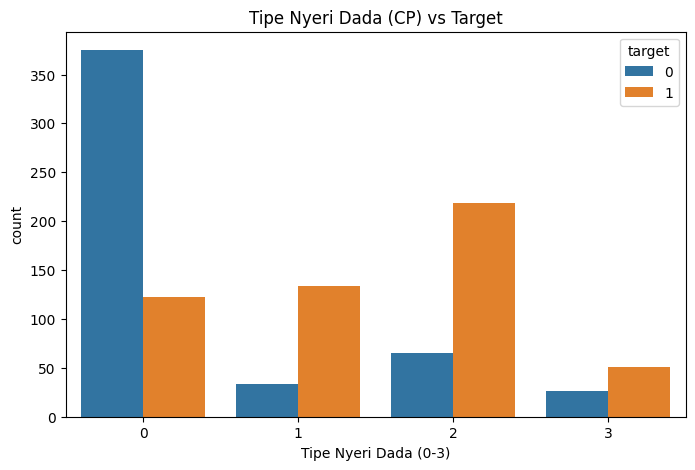

In [9]:
# 7. Analisis Kategorikal Utama (Chest Pain Type)
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Tipe Nyeri Dada (CP) vs Target')
plt.xlabel('Tipe Nyeri Dada (0-3)')
plt.show()

In [6]:
# 5. Training Model (Menggunakan Random Forest)
import pandas as pd # Import pandas here to ensure df can be loaded
# Load Dataset (duplicate from yc0zUo9gwIaG to make this cell self-contained)
df = pd.read_excel('/content/data sudah cleanning_heart.xlsx')

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train);

# 6. Prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilitas untuk hitung AUC

In [8]:
# 7. EVALUASI MODEL
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("\n" + "="*30)
print("HASIL EVALUASI MODEL")
print("="*30)

# Menghitung Metrik Utama
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score  : {f1_score(y_test, y_pred):.4f}")
print(f"AUC Score : {roc_auc_score(y_test, y_prob):.4f}")

# Menampilkan Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


HASIL EVALUASI MODEL
Accuracy  : 0.9854
Precision : 1.0000
Recall    : 0.9709
F1-Score  : 0.9852
AUC Score : 1.0000

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



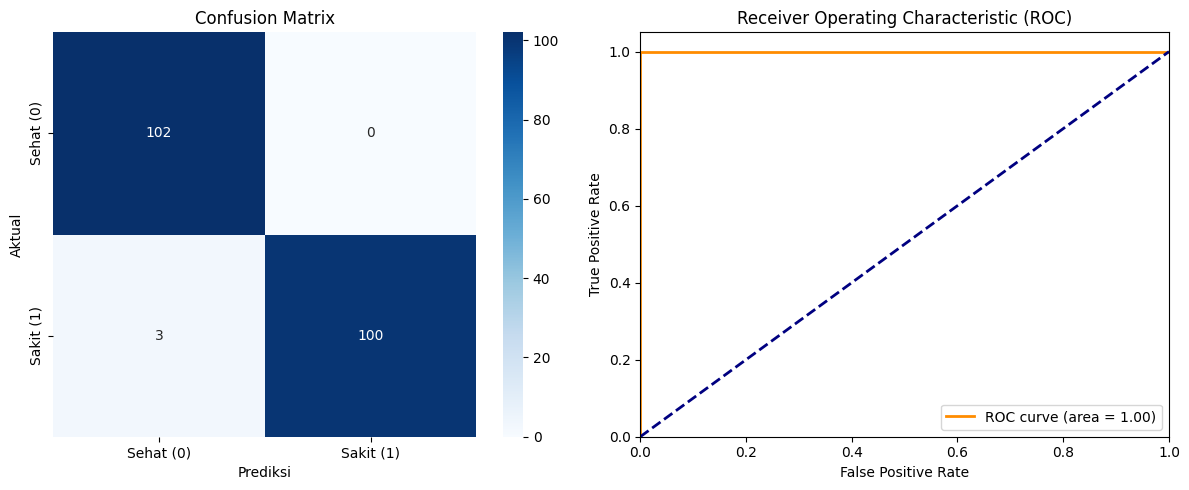

In [10]:
# 8. Visualisasi Confusion Matrix & ROC Curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.figure(figsize=(12, 5))

# Plot Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sehat (0)', 'Sakit (1)'],
            yticklabels=['Sehat (0)', 'Sakit (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

# Plot ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()